In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# the function to remove the extreme values
# path_name is the name of test datasets
# num_max_value is how many max value to remove, for example, if num_max_value is 1, the max value of Ax,Ay,Az,Gx,Gy,Gz
# will be removed; if num_max_value is 2, the max 2 value of Ax,Ay,Az,Gx,Gy,Gz will be removed
# column_num
def remove_extreme_value(path_name, num_max_value, num_min_value, column_num):
    df=pd.read_csv('TestData'+'/'+path_name,skiprows=2)
    insert_line=pd.DataFrame(df.columns.values).T
    df.columns=insert_line.columns
    df=pd.concat([insert_line,df],axis=0)
    df.columns=['Gx','Gy','Gz','Ax','Ay','Az']
    df.index=range(len(df))
    df['Gx']=df['Gx'].astype(float)
    df['Gy']=df['Gy'].astype(float)
    df['Gz']=df['Gz'].astype(float)
    df['Ax']=df['Ax'].astype(float)
    df['Ay']=df['Ay'].astype(float)
    df['Az']=df['Az'].astype(float)
    dff=df[column_num]
    for i in range(num_max_value):
        arr=np.argmax(dff.values,axis=0)
        df.index=range(len(df))
        dff.index=range(len(dff))
        df=df.drop(arr,axis=0)
        dff=dff.drop(arr,axis=0)
    for t in range(num_min_value):
        arr=np.argmin(dff.values,axis=0)
        df.index=range(len(df))
        dff.index=range(len(dff))
        df=df.drop(arr,axis=0)
        dff=dff.drop(arr,axis=0)
    return df

In [48]:
def plot_features(df):
    x = range(len(df)) 
    plt.figure(figsize=(18,10)) 
    plt.subplot(211)
    plt.plot(x,df['Gx'],"b",linewidth=1.5) 
    plt.plot(x,df['Gy'],"r",linewidth=1.5) 
    plt.plot(x,df['Gz'],"g",linewidth=1.2) 
    plt.ylabel("Angular velocity[Rad/s]")  
    plt.title("Path name:"+path_name) 
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.subplot(212)
    plt.plot(x,df['Ax'],"b",linewidth=1.5) 
    plt.plot(x,df['Ay'],"r",linewidth=1.5) 
    plt.plot(x,df['Az'],"g",linewidth=1.5) 
    plt.ylabel("Acceleration[g]")  
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     plt.savefig(path_name[:-4]+'.png')
    plt.show()

EXAMPLE:

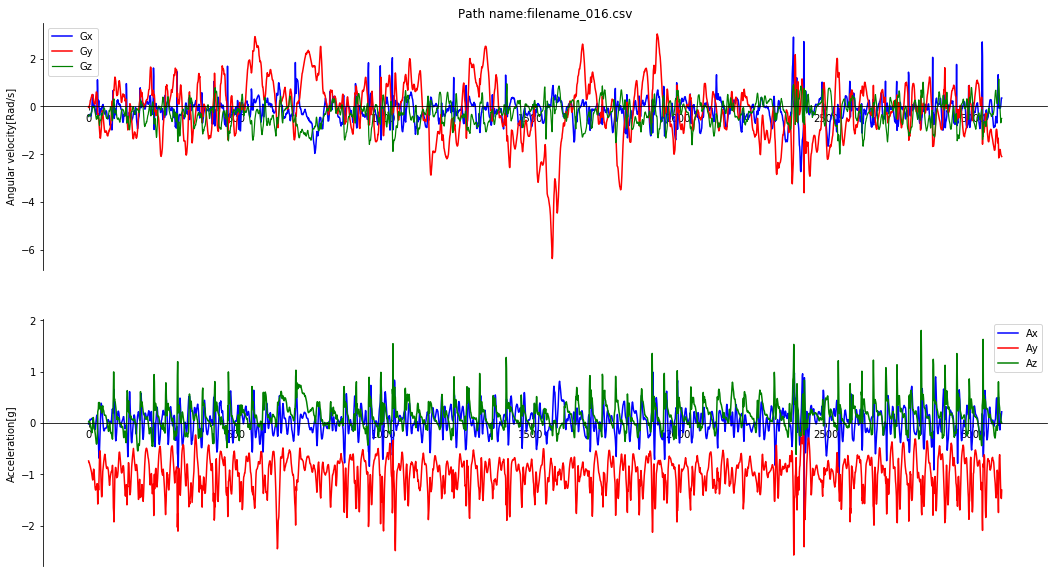

In [67]:
column_num=['Gx','Gy','Gz','Ax','Ay','Az']
path_name='filename_016.csv'
num_max_value=2
num_min_value=1
df=remove_extreme_value(path_name, num_max_value, num_min_value, column_num)
plot_features(df)